In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [263]:
df = pd.read_json("ultimate_data_challenge.json")
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [264]:
df.shape

(50000, 12)

In [265]:
df.info

<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2   

In [266]:
df.describe

<bound method NDFrame.describe of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2 

In [267]:
#drop the nan value from data set(DATA CLEANING)

df.dropna()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [268]:
df.shape

(50000, 12)

In [269]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [270]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

#####  we have avg_rating_of_driver, phone and avg_rating_by_driver has some missing value 

In [271]:
df['phone'].fillna('No Phone', inplace=True)
df['phone'].value_counts()


iPhone      34582
Android     15022
No Phone      396
Name: phone, dtype: int64

In [272]:
##### Average rating of driver

In [273]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [274]:
df['avg_rating_of_driver'].describe()

count    50000.000000
mean         4.650038
std          0.575601
min          1.000000
25%          4.500000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [275]:
df['avg_rating_of_driver'].isna().sum()

0

In [276]:
##### Average Rating by Driver

In [277]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())

In [278]:
df['avg_rating_by_driver'].isna().sum()

0

In [279]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [280]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [281]:
### converting the column to datetime and then setting X and Y value

In [282]:
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)
df['signup_date'] = pd.to_datetime(df.signup_date)

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?


In [283]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1

<AxesSubplot:xlabel='was_retained', ylabel='trips_in_first_30_days'>

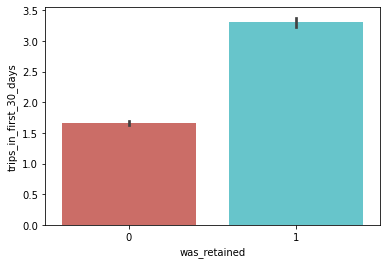

In [284]:
sns.barplot(x='was_retained', y='trips_in_first_30_days', data=df, palette = 'hls')

In [285]:
df.was_retained.value_counts(normalize=True)

0    0.62392
1    0.37608
Name: was_retained, dtype: float64

62.39 percentage of the riders has retained

ploting the heat of dataset

<AxesSubplot:>

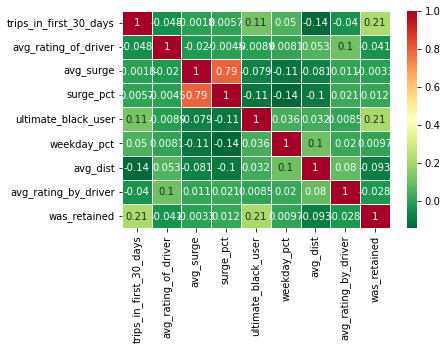

In [286]:


cor=df.corr()
# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(cor, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [287]:
cor['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_by_driver     -0.027548
avg_rating_of_driver     -0.041082
avg_dist                 -0.092780
Name: was_retained, dtype: float64

In [288]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'was_retained'],
      dtype='object')

we can drope 'signup_date'phone as there is not relation showed in thr heat map

In [289]:
df = df.drop(['signup_date', 'phone','last_trip_date'], axis=1)

In [290]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,black_user_False,black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0


need to use label encoder for city and ultimate_blacked_user column

 df=pd.get_dummies(df.city)

In [291]:
# encode the city in numerical value
df = pd.concat([df,pd.get_dummies(df['city'], prefix='city')],axis=1)
# drop the city old column
df.drop(['city'],axis=1, inplace=True)

In [292]:
# encode the city in numerical value
df = pd.concat([df,pd.get_dummies(df['ultimate_black_user'], prefix='black_user')],axis=1)
# drop the city old column
df.drop(['ultimate_black_user'],axis=1, inplace=True)

In [293]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,city_Astapor,city_King's Landing,city_Winterfell,black_user_False,black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0


In [294]:
# setting x and y value before applying any model

X=df.drop(['was_retained'],axis=1)
Y=df['was_retained']

In [295]:
print(X.shape)
print(Y.shape)

(50000, 12)
(50000,)


Looking at the DataSet I decided to use random forset model 

###  Model

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [299]:
cf = RandomForestClassifier(max_depth=10, random_state=200)
rf_para={'n_estimators':np.arange(5,100), 'max_depth':np.arange(1,15)}
clf = RandomizedSearchCV(cf, rf_para, cv=5)

In [300]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=200),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [301]:

y_pred = clf.predict(X_test)

In [302]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7783333333333333


In [303]:
print('roc_auc_score:', roc_auc_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))

roc_auc_score: 0.7498342638234686
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9377
           1       0.74      0.64      0.68      5623

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.77     15000



3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).


In [311]:
pd.DataFrame({'best_features': clf.best_estimator_.feature_importances_}, index=X_train.columns)


,best_features
trips_in_first_30_days,0.077042
avg_rating_of_driver,0.043723
avg_surge,0.089588
surge_pct,0.148462
weekday_pct,0.134468
avg_dist,0.071059
avg_rating_by_driver,0.177185
city_Astapor,0.032923
city_King's Landing,0.122652
city_Winterfell,0.020241


surge_pct,weekday_pct,avg_rating_by_driver,avg_surge these are important factors
when it comes to determine the retation. And city King's Landing riders are more likely in retation. Focusing on these areas long term retantion could be increase